In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])
del hf

regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [3]:
def circle(center_x,center_y,radius,h,k):
    within_circle=radius>np.sqrt((center_x-h)**2+(center_y-k)**2)
    #print(within_circle)
    return within_circle

center_x=cell_pos[707][0]
center_y=cell_pos[707][1]

boolean_arr=[]
for j in range(0,83205):
    boolean_ind=circle(center_x,center_y,100,cell_pos[j][0],cell_pos[j][1])
    boolean_arr.append(boolean_ind)
print(sum(boolean_arr))

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ushort_scalars
  


563


In [4]:
random_neurons=np.random.choice(range(83205),563,replace=False)

In [12]:
dat=np.hstack((neural_dat[:,boolean_arr],neural_dat[:,random_neurons]))

In [13]:
corrs=np.corrcoef(dat.T)

In [14]:
print(dat.shape)

(2880, 1126)


In [15]:
print(corrs.shape)

(1126, 1126)


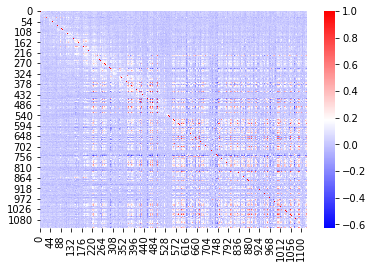

In [17]:
import seaborn as sns

sns.heatmap(corrs,cmap='bwr')

In [18]:
boolean_arr=[]
for j in range(0,83205):
    boolean_ind=circle(center_x,center_y,50,cell_pos[j][0],cell_pos[j][1])
    boolean_arr.append(boolean_ind)
print(sum(boolean_arr))

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ushort_scalars
  


170


In [20]:
random_neurons=np.random.choice(range(83205),170,replace=False)

In [21]:
dat=np.hstack((neural_dat[:,boolean_arr],neural_dat[:,random_neurons]))

In [22]:
corrs=np.corrcoef(dat.T)

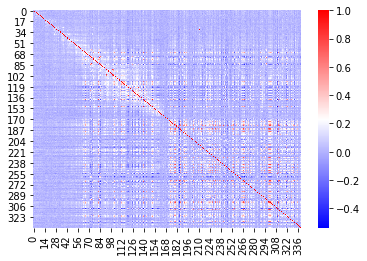

In [23]:
import seaborn as sns

sns.heatmap(corrs,cmap='bwr')